In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [3]:
df1kk = pd.read_csv('poker1kk.csv')
df1kk.head()

,First Card,Second Card,Third Card,Fourth Card,Fifth Card,Result
0,King Clubs,Ace Clubs,Ten Diamonds,Queen Clubs,Ten Clubs,Pair
1,Queen Spades,Ten Clubs,Jack Hearts,King Hearts,Ten Hearts,Pair
2,Nine Diamonds,Ace Spades,Nine Hearts,King Clubs,Jack Spades,Pair
3,Jack Diamonds,Ten Spades,Queen Diamonds,Ace Spades,Nine Clubs,High Card
4,King Spades,Queen Diamonds,King Clubs,Nine Hearts,Ten Hearts,Pair


In [4]:
df1kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   First Card   1000000 non-null  object
 1   Second Card  1000000 non-null  object
 2   Third Card   1000000 non-null  object
 3   Fourth Card  1000000 non-null  object
 4   Fifth Card   1000000 non-null  object
 5   Result       1000000 non-null  object
dtypes: object(6)
memory usage: 45.8+ MB


In [5]:
df1kk.describe()   

,First Card,Second Card,Third Card,Fourth Card,Fifth Card,Result
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,24,24,24,24,24,6
top,Ten Spades,Nine Clubs,Nine Hearts,Nine Spades,Ten Clubs,Pair
freq,42277,41997,42014,41918,42199,541879


In [6]:
#unique values from each column
df1kk.nunique()

First Card     24
Second Card    24
Third Card     24
Fourth Card    24
Fifth Card     24
Result          6
dtype: int64

In [7]:
#check for null values
df1kk.isnull().sum()


First Card     0
Second Card    0
Third Card     0
Fourth Card    0
Fifth Card     0
Result         0
dtype: int64

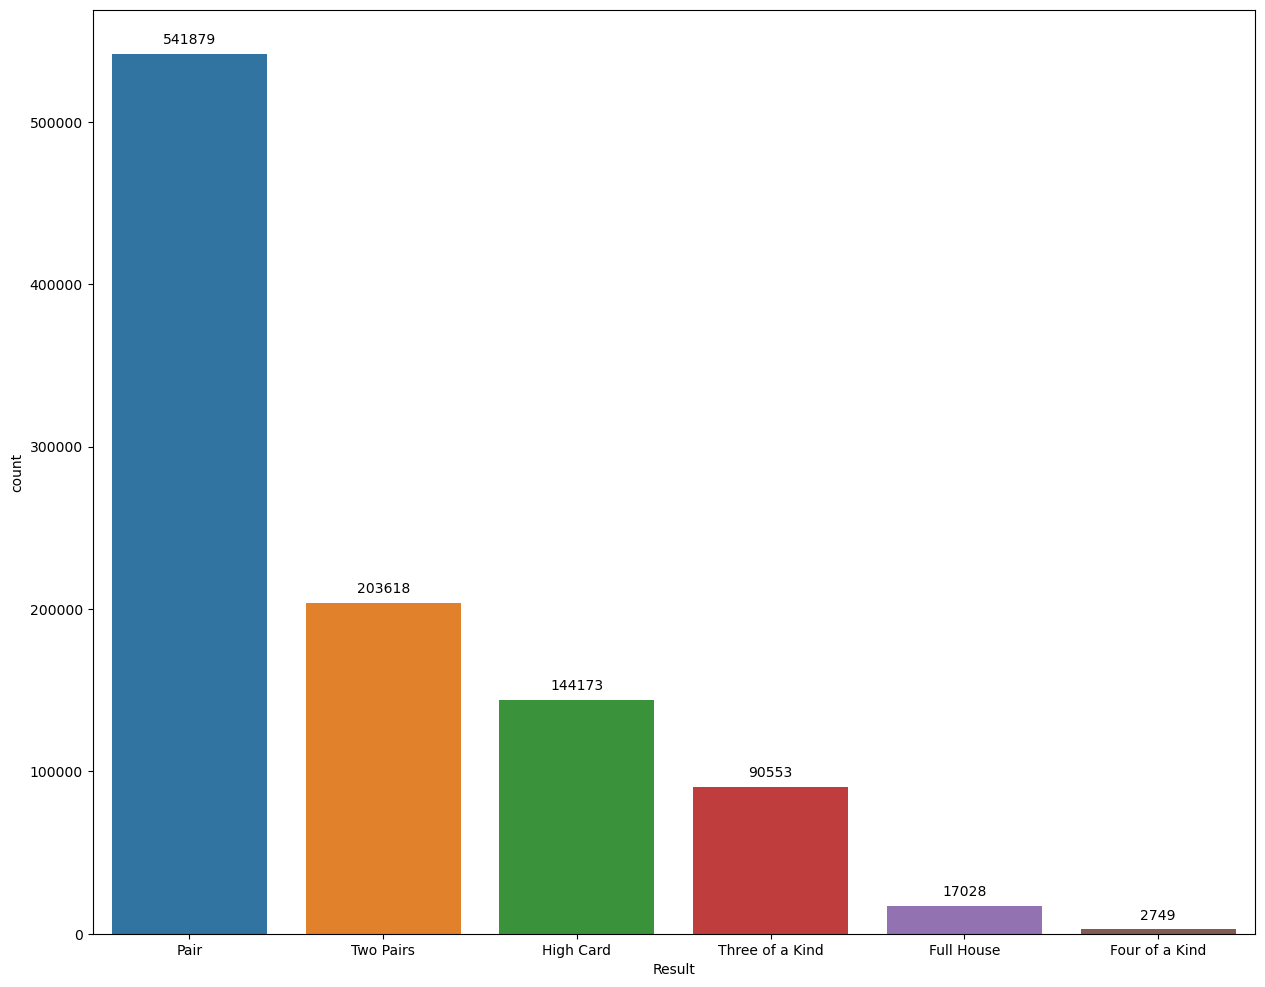

In [8]:
#visualize the data and show exact values on the top of the bars
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='Result', data=df1kk, order=df1kk['Result'].value_counts().index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

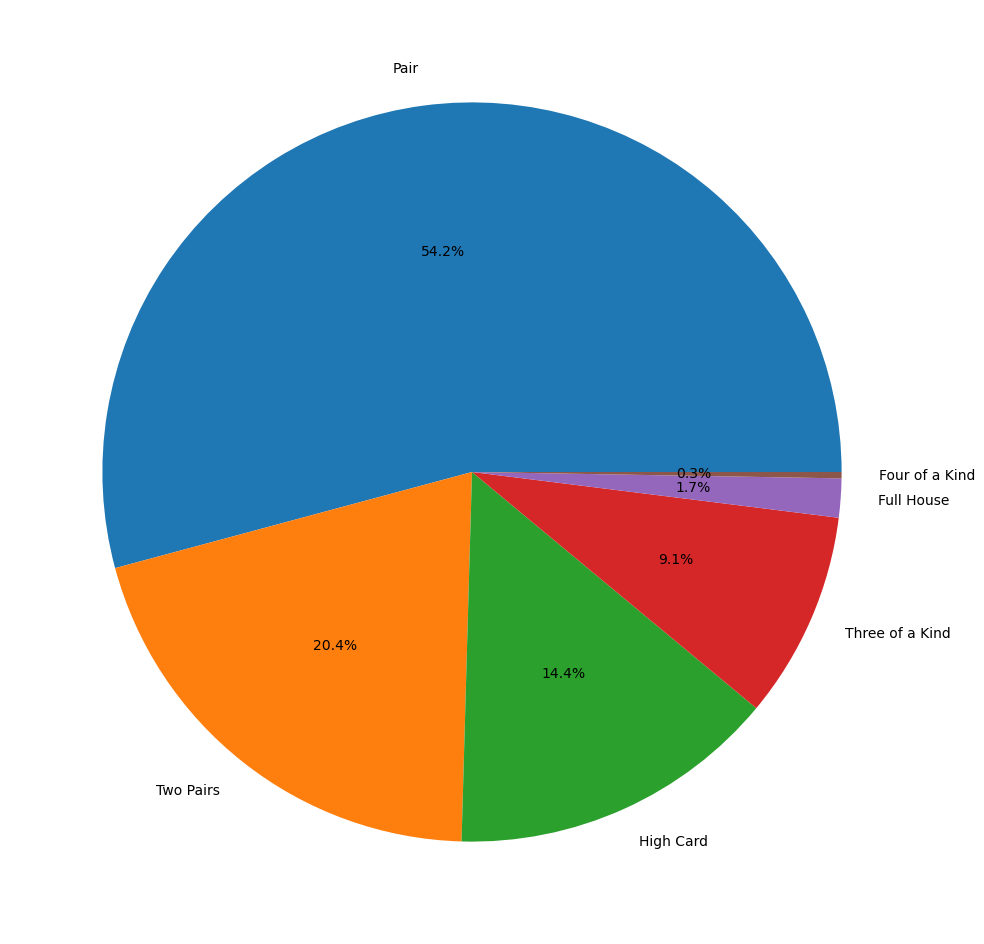

In [9]:
# Show percentage of each class in the dataset based on the total number of samples
percentages = df1kk['Result'].value_counts(normalize=True) * 100

# Make a pie chart
plt.figure(figsize=(15, 12))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.show()



In [10]:
#create a new df for changing the object values to numeric
df1kk_num = df1kk.copy()


In [11]:
cat_cols = df1kk_num.select_dtypes(include=['object']).columns
num_cols = df1kk_num.select_dtypes(exclude=['object']).columns

In [12]:
print(cat_cols)

Index(['First Card', 'Second Card', 'Third Card', 'Fourth Card', 'Fifth Card',
       'Result'],
      dtype='object')


In [13]:
#change categorical data to numerical data

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Loop through each categorical column in cat_cols
for col in cat_cols:
    # Fit the LabelEncoder object to the categorical column
    le.fit(df1kk_num[col])
    # Transform the categorical column to an integer column
    df1kk_num[col] = le.transform(df1kk_num[col])

In [14]:
from sklearn.model_selection import train_test_split

#set the target variable
y = df1kk_num['Result']
X = df1kk_num.drop(['Result'], axis=1)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [16]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 1.0441366444576787
Mean Absolute Error (MAE): 0.8115692184834593
R-squared Score: -8.76574723873702e-06

Results for Decision Tree:
Mean Squared Error (MSE): 0.04631
Mean Absolute Error (MAE): 0.01967
R-squared Score: 0.9556471787600098

Results for Random Forest:
Mean Squared Error (MSE): 0.010642301999999998
Mean Absolute Error (MAE): 0.04420819999999994
R-squared Score: 0.9898074688363638



In [ ]:
accuracy

In [ ]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

In [ ]:
#create a function that checks for the best amount of neighbors
#for predicting continuous variables
#regression version

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in regression is: {best_k} with an R-squared score of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()